## Importing Libraries

- **pandas**: For data manipulation and analysis
- **sklearn.cluster**: For clustering algorithms
- **sklearn.model_selection**: For splitting the dataset into training and testing sets
- **sklearn.ensemble**: For building ensemble models
- **scipy.cluster.hierarchy**: For hierarchical clustering algorithms
- **matplotlib.pyplot**: For data visualization
- **seaborn**: For creating attractive and informative statistical graphics
- **random**: For generating random numbers
- **numpy**: For numerical computing


In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.spatial.distance import cdist
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import os


## Reading in the input data


In [2]:
# Load the data
try:
    data = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Could not find the input file. Please check the file path and try again.")
    exit()

## Viewing the first few rows of the data


In [3]:
data.head()

,device_name,min_consumption,max_consumption,device_age
0,bulb,100.0,120.0,3
1,LED TV 42 INCH,58.0,60.0,5
2,3''belt sander,1000.0,1000.0,4
3,Air cooler,65.0,80.0,4
4,Air purifier,25.0,30.0,3


## Getting values for input_power, working_hours, and output_power

This code cell generates values for the `input_power`, `working_hours`, and `output_power` columns of the `data` DataFrame based on the `min_consumption` and `max_consumption` columns.


In [3]:
min_c = data['min_consumption'].values
max_c = data['max_consumption'].values
random_consumption = [rd.uniform(min_c[i], max_c[i]) for i in range(len(min_c))]
working_hours = []
for i in range(len(min_c)):
    random_hours = rd.randint(0,24)
    working_hours.append(random_hours)
data['input_power'] = random_consumption
data['working_hours'] = working_hours
output_power = []
for i in range(len(min_c)):
    output_power.append(rd.uniform(random_consumption[i] * 0.70 , random_consumption[i]))
    output_power[i] = output_power[i]
data['output_power'] = output_power 
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power
0,bulb,100.0,120.0,3,107.309403,23,77.743099
1,LED TV 42 INCH,58.0,60.0,5,58.310312,10,44.435175
2,3''belt sander,1000.0,1000.0,4,1000.000000,10,870.077334
3,Air cooler,65.0,80.0,4,79.024401,19,60.063832
4,Air purifier,25.0,30.0,3,27.478299,22,25.197709


## Calculating efficiency metrics

This code cell calculates the `Enhanced_efficiency` and `efficiency` columns of the `data` DataFrame based on the `input_power`, `output_power`, and `min_consumption` columns.


In [4]:
Enhanced_efficiency = []
for i in range(len(min_c)):
    Enhanced_efficiency.append(output_power[i]/random_consumption[i]*100)
data['Enhanced_efficiency'] = Enhanced_efficiency
efficiency = data['output_power']/data['min_consumption']*100
data['efficiency'] = efficiency
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,107.309403,23,77.743099,72.447611,77.743099
1,LED TV 42 INCH,58.0,60.0,5,58.310312,10,44.435175,76.204660,76.612371
2,3''belt sander,1000.0,1000.0,4,1000.000000,10,870.077334,87.007733,87.007733
3,Air cooler,65.0,80.0,4,79.024401,19,60.063832,76.006690,92.405895
4,Air purifier,25.0,30.0,3,27.478299,22,25.197709,91.700394,100.790835


## Handling values


In [5]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,107.309403,23,77.743099,72.447611,77.743099
1,LED TV 42 INCH,58.0,60.0,5,58.310312,10,44.435175,76.204660,76.612371
2,3''belt sander,1000.0,1000.0,4,1000.000000,10,870.077334,87.007733,87.007733
3,Air cooler,65.0,80.0,4,79.024401,19,60.063832,76.006690,92.405895
4,Air purifier,25.0,30.0,3,27.478299,22,25.197709,91.700394,100.790835


## Adjusting efficiency values


In [6]:
List_efficiency = data['efficiency'].values
List_enhan_efficiency = data['Enhanced_efficiency'].values

for i in range(len(List_efficiency)):
    # if enhance efficiency is greater than enhance efficiency then minus abs value for efficiency
    if List_enhan_efficiency[i] > List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] - abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is less than enhance efficiency then plus abs value for efficiency
    elif List_enhan_efficiency[i] < List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is equal to enhance efficiency then plus abs value for efficiency
    else:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
data['efficiency'] = List_efficiency
data['efficiency'] = data['efficiency'].apply(lambda x: 200 if x > 200 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: 0 if x < 0 else x)
data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 200 if x > 200 else x)
data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 0 if x < 0 else x)
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,107.309403,23,77.743099,72.447611,83.038586
1,LED TV 42 INCH,58.0,60.0,5,58.310312,10,44.435175,76.204660,77.020081
2,3''belt sander,1000.0,1000.0,4,1000.000000,10,870.077334,87.007733,87.007733
3,Air cooler,65.0,80.0,4,79.024401,19,60.063832,76.006690,108.805100
4,Air purifier,25.0,30.0,3,27.478299,22,25.197709,91.700394,109.881276


## Training a GradientBoostingRegressor model


In [7]:
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
Normal = GradientBoostingRegressor(random_state=0)
Normal.fit(X_train, y_train)
Normal.score(X_test, y_test)


0.5445088534975847

In [8]:
#feature to predict enhanced efficiency with K-centroid
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['Enhanced_efficiency']


## Hariarchical clustering


In [9]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_train)
print(y_hc)


[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0]


/home/xer0bit/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [10]:
def find_centroid(cluster):
    """
    Calculates the centroid of a cluster.

    Args:
    
        cluster: A list of data points.

    Returns:
        The centroid of the cluster.
    """
    centroid = sum(cluster) / len(cluster)
    return centroid

## k-centroid hierarchical clustering


In [11]:
def hierarchical_clustering(dataset, k):
    """
    Performs hierarchical clustering on the given dataset using k-centroid link.

    Args:
        dataset: A list of data points.
        k: The number of neighbors of a centroid.

    Returns:
        A list of clusters.
    """
    
    # Initialize the clusters.
    clusters = [[x] for x in dataset]
    
    # Iterate over all pairs of clusters.
    for _ in range(len(dataset) - 1):
        min_distance = float('inf')
        merge_clusters = ()
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # Calculate the distance between the two clusters.
                dist_1 = []
                dist_2 = []
                
                # Find centroids for clusters Ci and Cj.
                centroid_i = find_centroid(clusters[i])
                centroid_j = find_centroid(clusters[j])
                
                # Calculate distances from objects in Ci to centroid_i.
                for obj in clusters[i]:
                    dist_1.append(np.linalg.norm(obj - centroid_i))
                
                # Calculate distances from objects in Cj to centroid_j.
                for obj in clusters[j]:
                    dist_2.append(np.linalg.norm(obj - centroid_j))
                
                # Select the k nearest neighbors from each cluster.
                dist_1 = sorted(dist_1)[:k]
                dist_2 = sorted(dist_2)[:k]
                
                neighbors = []
                for obj1 in dist_1:
                    for obj2 in dist_2:
                        #obj1 and obj2 are the distances from Ci to Cj and Cj to Ci respectively calculated above.
                        neighbors.append(obj1 + obj2)


                # Calculate the average  = total distance / min(k, len(Ci) * len(Cj)).
                average_distance = sum(neighbors) / min(k, len(clusters[i]) * len(clusters[j]))
                if average_distance < min_distance:
                    min_distance = average_distance
                    # Store the closest pair of clusters.
                    merge_clusters = (i, j)
        
        # Merge the two closest clusters.
        merged_cluster = clusters[merge_clusters[0]] + clusters[merge_clusters[1]]
        clusters = [c for idx, c in enumerate(clusters) if idx not in merge_clusters]
        clusters.append(merged_cluster)
    
    # Return the list of clusters.
    return clusters


In [14]:
# Perform clustering on the training data
clusters = hierarchical_clustering(X_train.values, 3)

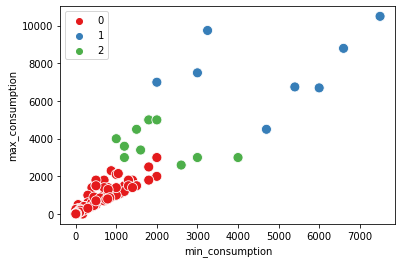

In [14]:
sns.scatterplot(x='min_consumption', y='max_consumption', hue=y_hc, data=X_train, palette='Set1', s=100)
plt.show()

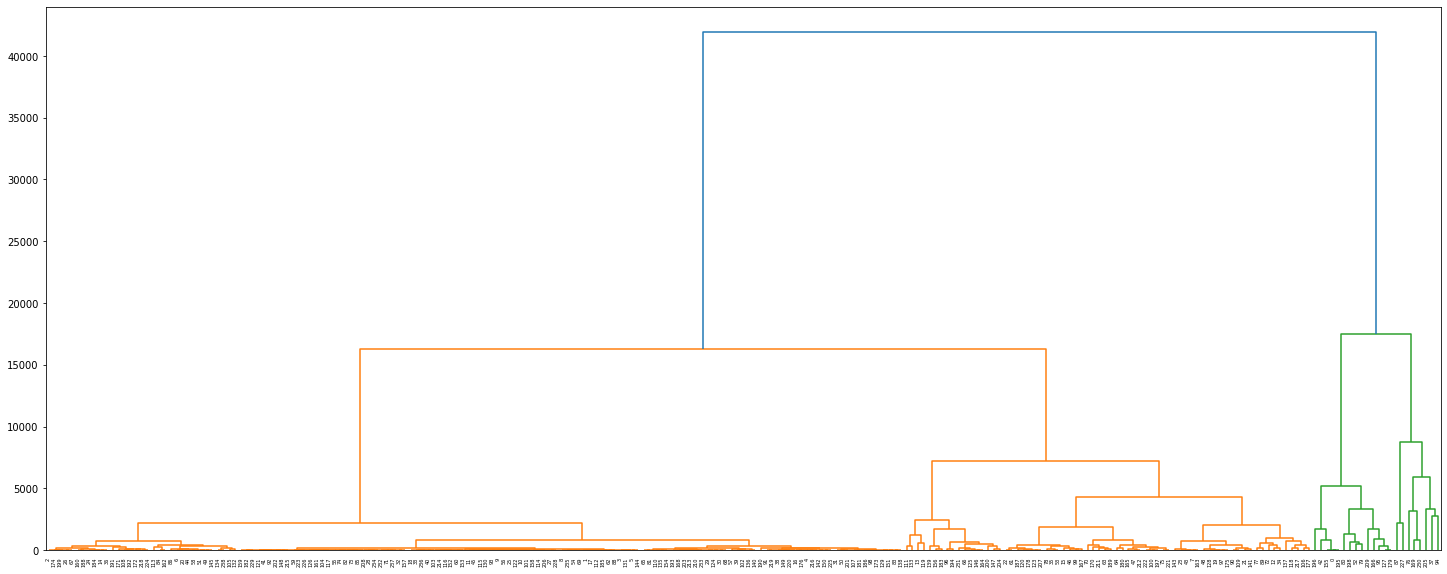

In [15]:
Z = linkage(X_train, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

Enhanced efficiency:  None


## Gradient Boosting Regressor Model with Enhanced Efficiency


In [64]:
cluster_labels = []
for idx, cluster in enumerate(clusters):
    for point in cluster:
        cluster_labels.append(idx)

regression_models = []
for cluster in clusters:
    cluster_indices = [idx for idx, point in enumerate(X_train.values) if np.array_equal(point, cluster)]
    
    if len(cluster_indices) > 0:
        X_train_cluster = X_train.iloc[cluster_indices, :]
        y_train_cluster = y_train.iloc[cluster_indices]
        
        regression_model = GradientBoostingRegressor(random_state=0)
        regression_model.fit(X_train_cluster, y_train_cluster)
        regression_models.append(regression_model)


In [65]:
def predict_enhanced_efficiency(data_point):
    cluster_index = None
    for idx, cluster in enumerate(clusters):
        if np.array_equal(data_point, cluster):
            cluster_index = idx
            break
    if cluster_index is None:
        return None  # Data point not found in any cluster

    model = regression_models[cluster_index]
    return model.predict([data_point])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
K_centroid = GradientBoostingRegressor(random_state=0)
K_centroid.fit(X_train, y_train)
K_centroid.score(X_test, y_test)
print("K_centroid efficiency score: ", K_centroid.score(X_test, y_test))

K_centroid efficiency score:  -0.5198801467364509


## Test input


In [71]:
test_input = [[300, 600, 400]]
test_output = Normal.predict(test_input)
print("Normal efficiency: ", test_output)
test_output = K_centroid.predict(test_input)
print("Enhanced efficiency: ", test_output)


Normal efficiency:  [130.61874525]
Enhanced efficiency:  [79.81575917]


/home/xer0bit/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/xer0bit/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Saving models


In [ ]:
import pickle
try:
    os.mkdir('pretrained_model')
except:
    pass
pickle.dump(Normal, open('pretrained_model/Normal.pkl', 'wb'))
pickle.dump(K_centroid, open('pretrained_model/K_centroid.pkl', 'wb'))
print("Model saved successfully")